In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
import chart_studio.plotly as py
import cufflinks as cf
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
cf.go_offline()

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

##### Data_30_B

In [2]:
def Data_read(name):
    temp = pd.read_csv('data/Data_30_'+ name + ".csv",index_col = [0])
    temp.columns = ['기온','현지기압','풍속','일일 누적강수량','해면기압','일일 누적일사량','습도','풍향']
    return temp

In [3]:
Data_30_B = Data_read('B')

In [4]:
Data_30_B

,기온,현지기압,풍속,일일 누적강수량,해면기압,일일 누적일사량,습도,풍향
id,,,,,,,,
0,12.2,989.6,0.6,0.0,1009.9,0.0,91.0,101.1
1,12.1,989.6,1.9,0.0,1010.0,0.0,91.9,165.3
2,12.1,989.7,2.3,0.0,1010.1,0.0,93.3,144.0
3,12.0,989.6,0.7,0.0,1010.0,0.0,93.4,115.9
4,12.0,989.7,1.7,0.0,1010.1,0.0,94.1,124.7
...,...,...,...,...,...,...,...,...
4315,21.3,988.0,0.4,0.0,1007.8,0.0,84.1,304.0
4316,21.3,988.1,0.9,0.0,1008.0,0.0,85.7,309.1
4317,21.2,988.3,1.3,0.0,1008.1,0.0,85.9,318.6


In [5]:
def visualize(data,name):
    Columns = ['기온','현지기압','풍속','일일 누적강수량','해면기압','일일 누적일사량','습도','풍향']
    data.iloc[:,Columns.index(name)].iplot(kind = 'scatter',xTitle = 'time',yTitle = name,title = '30일치 데이터 B위치')

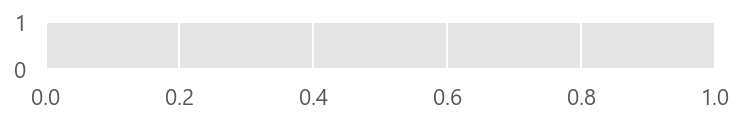

In [6]:
plt.subplot(8,1,1)
visualize(Data_30_B,'기온')
visualize(Data_30_B,'현지기압')
visualize(Data_30_B,'풍속')
visualize(Data_30_B,'일일 누적강수량')
visualize(Data_30_B,'해면기압')
visualize(Data_30_B,'일일 누적일사량')
visualize(Data_30_B,'습도')
visualize(Data_30_B,'풍향')

##### label과 비교

In [7]:
with open('data/Data_T_Y.pk','rb') as f:
    Data_Label = pickle.load(f)

In [8]:
Data_Label.shape

(4320, 18)

In [9]:
Data_30_B.shape

(4320, 8)

In [10]:
Data_B_with_label = pd.merge(Data_30_B,Data_Label,left_index = True,right_index = True)

In [11]:
Data_B_with_label

,기온,현지기압,풍속,일일 누적강수량,해면기압,일일 누적일사량,습도,풍향,Y00,Y01,...,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
id,,,,,,,,,,,,,,,,,,,,,
0,12.2,989.6,0.6,0.0,1009.9,0.0,91.0,101.1,12.5,11.5,...,10.0,7.0,7.5,7.0,9.0,10.0,9.5,9.0,8.0,9.0
1,12.1,989.6,1.9,0.0,1010.0,0.0,91.9,165.3,12.5,11.0,...,9.5,6.5,7.5,7.0,8.5,10.0,9.5,9.0,7.5,9.0
2,12.1,989.7,2.3,0.0,1010.1,0.0,93.3,144.0,12.0,11.0,...,9.0,6.5,7.5,6.5,8.0,9.5,9.5,8.5,7.5,8.5
3,12.0,989.6,0.7,0.0,1010.0,0.0,93.4,115.9,12.0,11.0,...,9.0,6.0,7.0,6.0,8.0,9.5,9.0,8.5,7.5,8.5
4,12.0,989.7,1.7,0.0,1010.1,0.0,94.1,124.7,12.0,10.5,...,8.5,6.0,7.0,6.0,7.5,9.5,9.0,8.5,7.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,21.3,988.0,0.4,0.0,1007.8,0.0,84.1,304.0,22.0,22.5,...,20.5,19.5,20.0,19.0,20.5,20.5,20.0,20.0,20.5,20.0
4316,21.3,988.1,0.9,0.0,1008.0,0.0,85.7,309.1,22.0,22.5,...,20.5,19.5,20.0,19.0,20.5,20.5,20.0,19.5,20.5,19.5
4317,21.2,988.3,1.3,0.0,1008.1,0.0,85.9,318.6,21.5,22.5,...,20.5,19.5,20.0,19.0,20.0,20.0,19.5,19.5,20.0,19.0


In [12]:
Corr_data_B = Data_B_with_label.corr().iloc[:8,8:]

In [13]:
Corr_data_B
# 일일 누적일사량이 0이므로 NaN떠버린다.

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
기온,0.979172,0.970238,0.973252,0.841002,0.840372,0.892414,0.795471,0.698961,0.897089,0.923403,0.931275,0.911746,0.778135,0.958731,0.931548,0.906402,0.891921,0.885659
현지기압,-0.022444,-0.051755,-0.041701,0.030836,0.025652,-0.036129,0.042926,0.068603,-0.073146,-0.045675,-0.051605,-0.063097,0.049745,-0.034837,-0.064839,-0.000912,-0.004289,-0.022919
풍속,0.339114,0.405538,0.401319,0.227331,0.227458,0.408172,0.353523,0.322956,0.423730,0.426960,0.427815,0.447519,0.336190,0.412935,0.420211,0.392503,0.396692,0.413540
일일 누적강수량,-0.198561,-0.170551,-0.172547,-0.198284,-0.197456,-0.163483,-0.162167,-0.168258,-0.129408,-0.128586,-0.129375,-0.120119,-0.179268,-0.164593,-0.170179,-0.167529,-0.159574,-0.156629
해면기압,-0.128496,-0.158855,-0.149692,-0.055849,-0.060834,-0.137151,-0.055000,-0.020494,-0.172511,-0.152035,-0.157565,-0.167390,-0.045518,-0.142347,-0.166945,-0.106324,-0.108664,-0.125352
일일 누적일사량,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
습도,-0.771936,-0.852243,-0.853102,-0.607628,-0.608010,-0.807598,-0.748955,-0.693636,-0.807064,-0.833781,-0.836446,-0.843657,-0.747431,-0.833405,-0.823042,-0.818139,-0.819501,-0.827915
풍향,0.222723,0.241624,0.227415,0.204723,0.202476,0.211214,0.138530,0.095604,0.213796,0.201528,0.215627,0.205220,0.150005,0.217709,0.226792,0.188515,0.189002,0.188200


In [14]:
temp = Corr_data_B.copy()

In [15]:
temp_data = abs(temp).sort_values(by = ['Y00', 'Y01', 'Y02', 'Y03', 'Y04', 'Y05', 'Y06', 'Y07', 'Y08', 'Y09',
       'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16', 'Y17'],ascending = False)

In [16]:
temp_data

,Y00,Y01,Y02,Y03,Y04,Y05,Y06,Y07,Y08,Y09,Y10,Y11,Y12,Y13,Y14,Y15,Y16,Y17
기온,0.979172,0.970238,0.973252,0.841002,0.840372,0.892414,0.795471,0.698961,0.897089,0.923403,0.931275,0.911746,0.778135,0.958731,0.931548,0.906402,0.891921,0.885659
습도,0.771936,0.852243,0.853102,0.607628,0.608010,0.807598,0.748955,0.693636,0.807064,0.833781,0.836446,0.843657,0.747431,0.833405,0.823042,0.818139,0.819501,0.827915
풍속,0.339114,0.405538,0.401319,0.227331,0.227458,0.408172,0.353523,0.322956,0.423730,0.426960,0.427815,0.447519,0.336190,0.412935,0.420211,0.392503,0.396692,0.413540
풍향,0.222723,0.241624,0.227415,0.204723,0.202476,0.211214,0.138530,0.095604,0.213796,0.201528,0.215627,0.205220,0.150005,0.217709,0.226792,0.188515,0.189002,0.188200
일일 누적강수량,0.198561,0.170551,0.172547,0.198284,0.197456,0.163483,0.162167,0.168258,0.129408,0.128586,0.129375,0.120119,0.179268,0.164593,0.170179,0.167529,0.159574,0.156629
해면기압,0.128496,0.158855,0.149692,0.055849,0.060834,0.137151,0.055000,0.020494,0.172511,0.152035,0.157565,0.167390,0.045518,0.142347,0.166945,0.106324,0.108664,0.125352
현지기압,0.022444,0.051755,0.041701,0.030836,0.025652,0.036129,0.042926,0.068603,0.073146,0.045675,0.051605,0.063097,0.049745,0.034837,0.064839,0.000912,0.004289,0.022919
일일 누적일사량,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
